# 第11回 ベイズ統計学


[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slt666666/biostatistics_text_wed/blob/main/source/_static/colab_notebook/chapter11.ipynb)

※Web上ではテーブルや記号など一部LaTeXが反映されず見にくくなってしまっていますが、Google Colabだとちゃんと見えます。

## はじめに

ここまで扱ってきた統計手法は「得られたデータが母集団からどのくらいの頻度（確率）で発生するのか」という考えが軸になっていました。このような統計学を頻度論と呼びます。

頻度論では、分布の平均値などのパラメータが定数で、得られたデータが変数（確率変数）となっていました。「平均$\mu=170$の正規分布から得られた身長$185$はどのくらいの確率で生じるか」という形です。

一方、**ベイズ統計学**では、「手元にあるデータはどのようなパラメータに基づく母集団から得られるだろうか」という考え方をします。

「身長を調べたら$174, 165, 183...$が得られたが、これはどの様なパラメータの母集団から得られる確率が高いか」という形です。母平均などのパラメータが変数（確率変数）で、データが定数と考えられます。

今回はこのベイズ統計学について基本的な所を学びます。

## 条件付き確率とベイズの定理

まずベイズ統計学において重要な定理である、**ベイズの定理**と、ベイズの定理を説明するのに必要な**条件付き確率**について説明します。

ある試行において、事象Aが起こったという条件下で事象Bが起きる確率のことを、事象Aの条件下で事象Bが起きる条件付き確率$P(B|A)$と言います。

条件付き確率の例として、

たとえば、6本のうち2本があたりのくじがあるとします。Aさんが1本のくじをひき、あたりを引いたときに、Bさんもあたりくじをひく確率は条件付き確率と言えます。

まず、何の条件も無しにBさんがあたりを引く確率は$P(B) = \dfrac{2}{6}$です。

Aさんが1本あたりを引いたという条件下では、Bさんがあたりを引く確率は、残る5本のうちあたりは1本なので、$P(B|A)=\dfrac{1}{5}$となります。

Aさんがあたりをひいたという条件によってBさんがあたりを引く確率が変化しました。この様な場合、条件付き確率で考える必要があります。

条件付き確率については、下式が成り立つことが知られています。

$P(B|A)P(A)= P(A \cap B)$

$P(A|B)P(B)= P(A \cap B)$

### ベイズの定理

ベイズの定理は、条件付き確率に関する等式を指し、

$P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$

で表されます。

この定理を用いると、$P(B|A)$を用いて、$P(A|B)$を求める事が出来ます。

先ほどのくじ引きの例で言うと、

$P(A|B)$ ... 二人目(B)があたりだったとき、一人目があたりの確率

$P(B|A)$ ... 一人目(A)があたりだったとき、二人目があたりの確率

となるので、求めるのが簡単そうな$P(B|A)$を用いて、難しそうな$P(A|B)$を求める事が出来ます。

よく例として用いられるのは病気の診断です。

$A$ ... 病気に実際になっている事象

$B$ ... 検査で陽性になる事象

があったとします。同じように考えると、

$P(A|B)$ ... 検査が陽性だったとき、実際に病気である確率

$P(B|A)$ ... 病気の時に、検査が陽性になる確率

となるので、患者の知りたい$P(A|B)$を、検査薬の精度である$P(B|A)$から求める事が出来ます。

### モンティ・ホール問題

有名な例として、モンティ・ホール問題があります。

```
3つのドアABCがあって、1つのドアは当たり、2つのドアははずれ。

1つのドアを選択した後、司会が残り2つのドアのうちはずれのドアを開けて見せてくれます。

ここで、最初に選んだドアを変更してもよいと言われます。

あたりをひくためにはドアを変更するべきか？変更しないべきか？
```

という問題です。

例として、最初にドアAを選んだところ、司会がドアBを開けて外れだと見せてくれた状況を考えてみます。

この条件下で最初に選んだドアAがあたりである確率$P(A|B)$をまず求めてみます。

ベイズの定理$P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$を用いて考えると、

前提条件無しにAを選んであたりの確率が$P(A) = \dfrac{1}{3}$

残り2つのドアから(あたりはずれ関係なしに)司会がBをあける確率$P(B) = \dfrac{1}{2}$

Aがあたりのとき、司会がBをあける確率$P(B|A)=\dfrac{1}{2}$

となるので、司会がBをあけた時、Aがあたりの確率は$P(A|B) = \dfrac{P(B|A)P(A)}{P(B)} = \dfrac{\dfrac{1}{2} \times \dfrac{1}{3}}{\dfrac{1}{2}}=\dfrac{1}{3}$となります。

次に、最初にAを選んで、司会がBのドアを開いたとき、Cがあたりの確率$P(C|B)$は、

同じようにベイズの定理より、$P(C|B)=\dfrac{P(B|C)P(C)}{P(B)}$と計算できます。

前提条件無しにCを選んで当たりの確率は$P(C)=\dfrac{1}{3}$

残り2つのドアから(あたりはずれ関係なしに)司会がBをあける確率は$P(B) = \dfrac{1}{2}$

Cがあたりの条件の下、司会がBをあける確率は$P(B|C)=1$

となるので、$P(C|B)=\dfrac{P(B|C)P(C)}{P(B)} = \dfrac{1 \times \dfrac{1}{3}}{\dfrac{1}{2}}=\dfrac{2}{3}$です。

よって、一見直感に反する気がしますが、もともと選んでいた扉から変更した方があたりの確率が2倍高くなることがわかります。

検査で陽性になった時に実際に病気である確率も計算してみましょう。

世界中で0.1%の人が病気にかかっているとします。$P(A) = 0.001$

検査結果が陽性である確率は3%です$P(B) = 0.03$

また、病気の患者が検査を受けると陽性の結果となる確率が99％とします。$P(B|A) = 0.99$

この時、検査で陽性になった時に実際に病気の確率は、ベイズの定理より…

$P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$



In [ ]:
# ベイズの定理を用いて、検査で陽性になった時に実際に病気である確率を求める。

0.99 * 0.001 / 0.03

[1] 0.033

ということで、99%正しい検査で陽性となっても、実際に病気である確率はかなり低くなります。

ただ、病気である確率は何も検査をしないと0.1％だったのが、検査によって陽性反応が出たという条件の下だと、病気である確率が3.2％に上がる、つまり32倍上がっていると考えることもできます。

<br>

このように、

開けたドアがあたりである確率や、病気である確率などを「別のドアははずれだった」や「検査結果が陽性だった」などの観測データを基に更新する事が出来ます。

もともとの確率を**事前確率**、得られたデータを基にベイズの定理によって更新された後の確率を**事後確率**と呼びます。

今回は確率を値として求めていましたが、この後扱うベイズ統計学では確率分布を主に扱っていきます。

つまり、データが得られる前にパラメータ(母平均など)が従うと想定する分布、**事前確率分布**(**事前分布**と呼ぶことが多い)を、データが得られた後に更新して**事後確率分布**(**事後分布**と呼ぶことが多い)を求める形になります。

## ベイズ統計の流れ

例えば、植物の葉の長さ$X$を5標本測定した結果、

$x_1=2.4, x_2=3.2, x_3=2.2, x_4=4.6, x_5=3.3$

というデータが得られたとします。

植物の葉の長さ$X$は正規分布$X\sim N(\theta, 1)$に従っているとすると、この$\theta$を求めたい状況です。

今回はこの$\theta$の分布を求めていきます。

まず事前分布として$\theta \sim N(0, 10000)$に従うと仮定します。分散がとても大きいので、$\theta$は大きい場合もあるし小さい場合もある、つまりあんまりよくわかってない状況です。この分布が**事前分布**になります。

さて、先ほど葉の長さ$X$は正規分布$N(\theta, 1) = \dfrac{1}{\sqrt{2\pi}}exp(-\dfrac{(x-\theta)^2}{2})$に従うので

$x_1=2.4, x_2=3.2, x_3=2.2, x_4=4.6, x_5=3.3$というデータが得られる確率は

$\prod_{5}^{i=1}\dfrac{1}{\sqrt{2\pi}}exp(-\dfrac{(x_i-\theta)^2}{2})$

$= \dfrac{1}{\sqrt{2\pi}}exp(-\dfrac{(2.4-\theta)^2}{2}) \times \dfrac{1}{\sqrt{2\pi}}exp(-\dfrac{(3.2-\theta)^2}{2}) \times \cdots \times \dfrac{1}{\sqrt{2\pi}}exp(-\dfrac{(3.3-\theta)^2}{2})$

で計算できます。

このデータが得られる事象を$D$とすると、$\theta$の下$D$が得られる確率の関数は、

$f(D|\theta) = \prod_{5}^{i=1}\dfrac{1}{\sqrt{2\pi}}exp(-\dfrac{(x_i-\theta)^2}{2})$

と表せます。

次に、パラメータ$\theta$の事前分布$N(0, 10000)$の確率密度関数$f(\theta)$は

$f(\theta) = \dfrac{1}{\sqrt{20000\pi}}exp(-\dfrac{\theta^2}{20000})$

と表せます。

データが得られたときに、$\theta$がどうなるか$f(\theta|D)$を知りたいので、

これらをベイズの定理$P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$に基づいて考えると、

$f(\theta|D) = \dfrac{f(D|\theta)f(\theta)}{f(D)}$

となります。

ただ、実際に計算をする際には、$f(D)$を求めることは非常に難しく、

また、後ほど説明する$f(D)$を直接$求めなくても良い仕組みがあったりするので、下記の様に表される場合が多いです。

$f(\theta|D) \propto f(D|\theta)f(\theta)$

$= \bigg\lbrack\prod_{5}^{i=1}\dfrac{1}{\sqrt{2\pi}}exp(-\dfrac{(x_i-\theta)^2}{2})\bigg\rbrack \cdot \bigg\lbrack\dfrac{1}{\sqrt{20000\pi}}exp(-\dfrac{\theta^2}{20000})\bigg\rbrack$

$\propto$は比例を意味します。

この様な計算で事後分布を得る事が出来ます。

これは正規分布の期待値$\theta$だけでなく、回帰式$収穫量=\beta_0+肥料\times\beta_1$のパラメーター$\beta_0, \beta_1$等においても同様に事後分布が求められます。

データに基づいて、肥料の効果がどの様な分布に従うか(事後分布)が得られます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter11/beta1.png?raw=true" alt="title" height="250px">

これまで扱ってきた線形回帰の肥料の効果$\beta_1 = 20$です！という形では無く、

事後分布という形で得られるので、肥料の効果$\beta_1$は95%の確率で$18.5 \leqq \beta_1 \leqq 20.6$に入る。みたいな情報が手に入ります。



### 計算が難しすぎる問題

と、事後分布から上手く計算出来ればよいのですが、

例えば先ほど得られた$\theta$の事後分布は、

$f(\theta|D) \propto f(D|\theta)f(\theta)$

$= \bigg\lbrack\prod_{5}^{i=1}\dfrac{1}{\sqrt{2\pi}}exp(-\dfrac{(x_i-\theta)^2}{2})\bigg\rbrack \cdot \bigg\lbrack\dfrac{1}{\sqrt{20000\pi}}exp(-\dfrac{\theta^2}{20000})\bigg\rbrack$

と表されていました。

この事後分布から$\theta$が$a \leqq \theta \leqq b$となる確率を求めるには、

$P(a \leqq \theta \leqq b) = \int_{a}^{b}f(\theta|D)d\theta$

という積分計算をする必要があります。しかし、この積分計算は難しすぎて出来ません。

そのため、この事後分布から平均値$\theta$は$90\%$の確率で$2.5 \leqq \theta \leqq 3.5$とか、肥料の効果$\beta_1$は$95\%$の確率で$18.5 \leqq \beta_1 \leqq 20.6$に入る。みたいな情報は簡単には手に入らず、あまり役に立ちません。

そこで、事後分布が複雑すぎて積分が出来ないという問題を解決するために、MCMCという技術を使用します。

## MCMCの基本

MCMC(Markov Chain Monte Carlo)とは**マルコフ連鎖モンテカルロ法**の略で、乱数を生成する手法の１つになります。

特にこのMCMCは**事後分布に従う乱数**を生成する事が出来る手法になります。

直接積分を行って、$P(a \leqq \theta \leqq b) = \int_{a}^{b}f(\theta|D)d\theta$　などを求めるのは難しいので、

事後分布$f(\theta|D)$に従う乱数を大量に生成することで、実際どのくらいの値が$95\%$で生じるのか等を評価する事が出来ます。

MCMCは**マルコフ連鎖**と**モンテカルロ法**を組み合わせた手法になります。簡単にそれぞれについて触れておきます。


### モンテカルロ法

モンテカルロ法は乱数を用いて近似計算を行う手法です。

円周率を近似計算する方法として有名です。

下図のように、辺の長さが2である正方形の中に半径1の円があると考えます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter11/circle1.png?raw=true" alt="title" height="250px">

この正方形の中にランダムに点を打っていきます。

すると、円の領域に入る点の個数は、領域の面積に比例すると考えられます。

つまり、$N$点ランダムに打つと、$X$点が円内に入ったとすると、

$\dfrac{X}{N}\sim\dfrac{\pi\times1^2}{2\times2}=\dfrac{\pi}{4}$

となるので、大数の法則から、打つ点の数$N$が増えるにつれて、$\dfrac{\pi}{4}$へ収束していくと考えられます。

下図の様に、モンテカルロ法により、ランダムに点を大量に打った結果から、$3.14...$に近い円周率が得られます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter11/circle2.png?raw=true" alt="title" height="250px">

この様に、直接計算するのではなく、乱数に基づいて複雑な問題の近似的な解や確率的な結果を導き出す手法がモンテカルロ法になります。

これは、例えば事後分布$f(\theta|D)$の期待値を計算で求めるには、$\int_{-\infty}^{\infty}f(\theta|D)\cdot \theta d\theta$を計算する必要がありますが、

事後分布に従う乱数を1000個くらい生成してその平均値を取れば、かなり事後分布$f(\theta|D)$の期待値に近い値を得ることが出来る、という風に活用できます。

### マルコフ連鎖

マルコフ連鎖は、「現在の状態だけが未来の状態を決める」というルールを持つ確率モデルを意味します。

式で表すと、ある時刻$t+1$の時の状態$X_{t+1}$は、その直前の時刻$t$の状態$X_t$によってのみ決まる、ということになるので

$P(X_{t+1}|X_t,...,X_1) = P(X_{t+1}|X_t)$

と表す事が出来ます。

具体的な例をあげると、明日の天気が今日の天気に基づいて決まるとします。

この時、明日の天気の確率は例えば下図の様な推移確率で表せます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter11/tenki.png?raw=true" alt="title" height="350px">

マルコフ連鎖の有用な特徴として、十分に長い時間が経ったとき、確率分布は初期状態に依存せず、ある特定の分布に収束します。

今回の天気のケースだと、天気の確率は晴れ25%曇り52%雨23%へと収束していきます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter11/tenki2.png?raw=true" alt="title" height="350px">

この収束した確率分布を**定常分布**と呼んだりします。

事後分布がこの定常分布になる様に推移確率を構築して利用できれば、事後分布に従う乱数が上手く生成できそうです。

### MCMCの例え

このモンテカルロ法とマルコフ連鎖を組み合わせたものがMCMCになるわけですが、「宝探し」に例えてみます。

まず、求めたい目的の分布（**事後分布**）を宝の地図の「本当の宝が埋まっている場所の確率分布」とします。

これは直接求めるのが計算的に難しいので、乱数を使用します。

まず、地図上の場所をランダムに掘ってみて、あたりが出た点の情報から目的の分布を求めるのが、**モンテカルロ法**になります、ただこれだけだと効率が悪いです。

そこで、「今いる場所」から「次に行く場所」を、宝が埋まっている確率が高い場所へ誘導するルールである、**マルコフ連鎖**を活用してより効率よくランダムな場所を選んでいきます。

つまり、MCMCは「現在の場所」の良し悪しで「次に行く場所」を決めるルールを使って、何度も移動を繰り返す（マルコフ連鎖）ことで、宝のありそうな場所（高確率な場所）ばかり掘ることに収束していき、結果的に宝の地図（目的の分布）の形がわかる、という手法になります。

## メトロポリス法

このMCMC法にはいくつか手法が存在しており、メトロポリス・ヘイスティングス法、ギブスサンプリング、ハミルトニアンモンテカルロ法 (HMC) などがあります。

ここでは**メトロポリス法**について簡単に触れておきます。

メトロポリス法では、ある確率密度関数$f(x)$に対し、下記の流れで$f(x)$に従う乱数を生成します。

1. 初期値$\theta_t$を決める
2. 次の候補値$\theta_{a}$をランダムに決める。
3. $f(\theta_t) < f(\theta_{a})$の場合は、その点に移動する$\theta_{t+1} = \theta_a$

3. $f(\theta_t) > f(\theta_{a})$の場合は、確率$r=\dfrac{f(\theta_{a})}{f(\theta_{t})}$で$\theta_{t+1} = \theta_a$へ移動し、それ以外の場合移動しない($\theta_{t+1} = \theta_t$)
4. 2 - 4を繰り返す。

イメージとしては下図のようになります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter11/metro.png?raw=true" alt="title" height="200px">

何度もこの移動を繰り返すことで、確率密度関数$f(x)$の中で、確率的に起きやすい部分の乱数を生成する形になります。

この様に大量の乱数を生成することで、目的とする事後分布の形や期待値などの値を推定する事が出来ます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter11/metro2.png?raw=true" alt="title" height="250px">

実際に期待値を求めたりする際には、生成した乱数を活用する際に、

* どれだけの乱数を生成するのか(**繰り返し数**と呼ぶ)

* 最初の初期値に引っ張られている部分(**バーンイン期間**と呼ぶ)を切り捨てる

* 連続した乱数($\theta_t, \theta_{t+1}$)は相関が強い場合があるので**間引く**必要がある

* 初期値を変えて乱数生成を何セット(**チェーン**と呼ぶ)も行い収束を評価する

といったことを意識する必要があります。


## RによるMCMCの実行

ここまで見てきたように、MCMCを実施するのは非常に複雑な処理を行う必要がありますが、

Rではベイズ推定を高速で行うことができる`Stan`というプログラムを使用するためのパッケージ`rstan`が利用できます。

`rstan`をインストールすることで、MCMCを簡単に実施する事が出来ます。

`rstan`はGoogle Colabにはもともとインストールされていないので、新たにインストールする必要があります。

```
# rstanのインストール
install.packages("rstan")
```

In [ ]:
# rstanをインストールする
install.packages("rstan")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘abind’, ‘tensorA’, ‘distributional’, ‘checkmate’, ‘matrixStats’, ‘posterior’, ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘RcppParallel’, ‘loo’, ‘QuickJSR’, ‘RcppEigen’, ‘BH’




今回はある植物の葉の長さが正規分布$N(\mu, \sigma^2)$に従っているとして、

この平均値$\mu$と標準偏差$\sigma$についてMCMCを用いたベイズ推定を実施してみます。

実際に30個体の植物の葉の長さを調査した結果が下の様に得られたときに、この平均値$\mu$や標準偏差$\sigma$が従う事後分布がどの様な分布となるのか求めます。

In [ ]:
# 得られた30個体の葉の長さのデータを読み込む
data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter11_leaf_length.csv")
# データの一部を表示
head(data)

,leaf_length
,<dbl>
1,3.41
2,3.70
3,3.95
4,5.29
5,2.80
6,3.72


Stanを動かすためには、事前分布等の情報を記述したStanファイル`xxx.stan`を用意する必要があります。

今回は下の内容を書き込んだ`chapter11_mcmc.stan`というファイルを使用します。

```
# データの説明
data {
    int N;
    vector[N] leaf_length;
}

# 事後分布を得たいパラメータの説明(今回は平均値と標準偏差)
parameters {
    real mu;
    real<lower=0> sigma;
}

# 事前分布の設定
model {
    for (i in 1:N) {
        leaf_length[i] ~ normal(mu, sigma);
    }
}
```

In [ ]:
# Stan用の設定ファイルをダウンロード
system("wget https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter11_mcmc.stan")

では実際に`Stan`を動かしていきます。

まずは`rstan`パッケージを読み込みます。

In [ ]:
# rstanパッケージの読み込み
library(rstan)

# 計算の高速化設定
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders


rstan version 2.32.7 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)




続いて、観測データをStanで動かす用に少し整えます。

In [ ]:
# 観測データをrstan用にまとめる
sample_size <- nrow(data)
data_list <- list(leaf_length = data$leaf_length, N = sample_size)
data_list

$leaf_length
 [1] 3.41 3.70 3.95 5.29 2.80 3.72 2.03 2.90 3.83 3.00 3.97 2.34 1.24 3.78 3.33
[16] 2.42 2.30 2.30 4.97 3.68 4.34 4.02 2.53 1.68 1.85 2.44 1.91 2.24 3.57 1.37

$N
[1] 30

`stan`関数で、観測データに基づきMCMCを実施します。

先ほど少し触れた、乱数をどれだけ生成するか(`iter`)や、何セット生成するか(`chains`)、初期値に引っ張られている最初の部分をどれだけ捨てるか(`warmup`)等を設定可能です。

In [ ]:
# 事後分布に従う乱数を設定した条件で生成する
mcmc_result <- stan(
  file = "chapter11_mcmc.stan",
  data = data_list,
  seed = 1,
  chains = 4,
  iter = 500,
  warmup = 100,
  thin = 1
)

on: 400 / 500 [ 80%]  (Sampling)
Chain 2: Iteration: 450 / 500 [ 90%]  (Sampling)
Chain 2: Iteration: 500 / 500 [100%]  (Sampling)
Chain 2: 
Chain 2:  Elapsed Time: 0.008 seconds (Warm-up)
Chain 2:                0.02 seconds (Sampling)
Chain 2:                0.028 seconds (Total)
Chain 2: 


`traceplot`関数でMCMCによって生成された、$\mu$と$\sigma$それぞれの事後分布に従う乱数のプロットが確認できます。

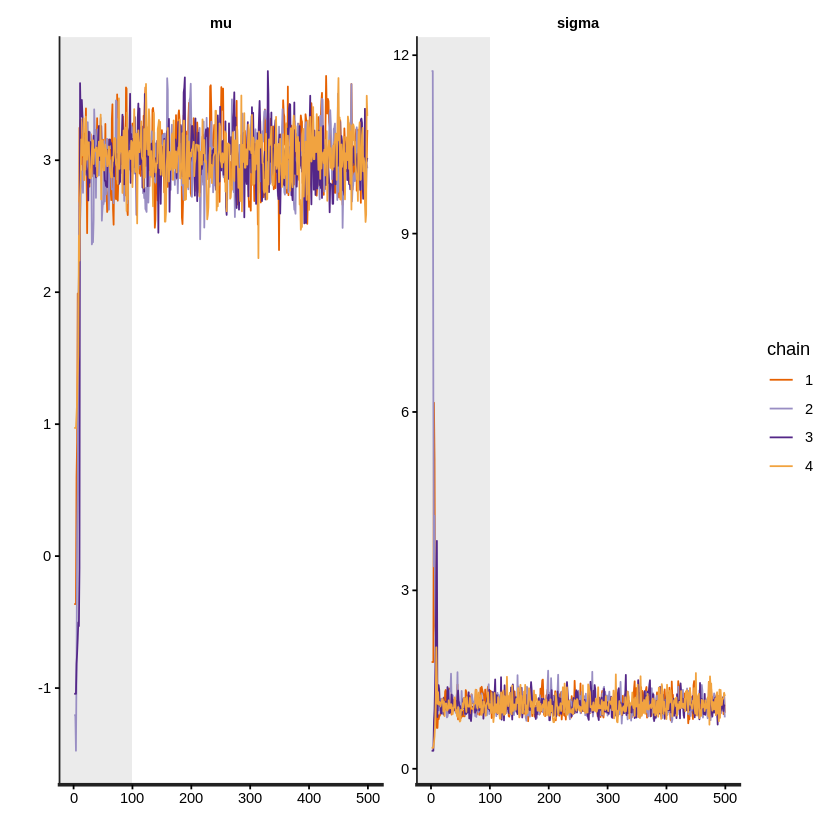

In [ ]:
# 各パラメータ毎の、事後分布に従う乱数のプロットを描写
traceplot(mcmc_result, inc_warmup = TRUE)

実際に生成された乱数は`extract`関数で取り出す事が出来ます。

生成された$\mu$の事後分布に従う乱数を確認してみると、

In [ ]:
# 乱数の一覧を表示(今回はμについてのみ)
mcmc_sample <- rstan::extract(mcmc_result, permuted = FALSE)
mu_mcmc <- mcmc_sample[, , "mu"]
mu_mcmc

chain:1,chain:2,chain:3,chain:4
3.167323,3.107269,3.137632,2.945441
3.158748,2.954508,2.945913,3.153128
3.012268,2.898971,3.252446,3.387234
2.921264,2.901714,3.327342,3.197402
2.987323,3.036068,3.135673,2.911286
3.132632,2.986705,3.053652,3.033662
3.088383,2.958998,2.585260,3.201880
2.959421,3.073231,2.999887,2.521098
3.042668,2.964002,3.318621,3.033941
3.267857,2.937091,3.429638,3.226385


この乱数をグラフ化すると、事後分布の形が分かります。

Warning message in `[<-.data.frame`(`*tmp*`, , x_vars, value = list(x = c(3.16732265137227, :
“replacement element 1 has 1600 rows to replace 400 rows”
`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


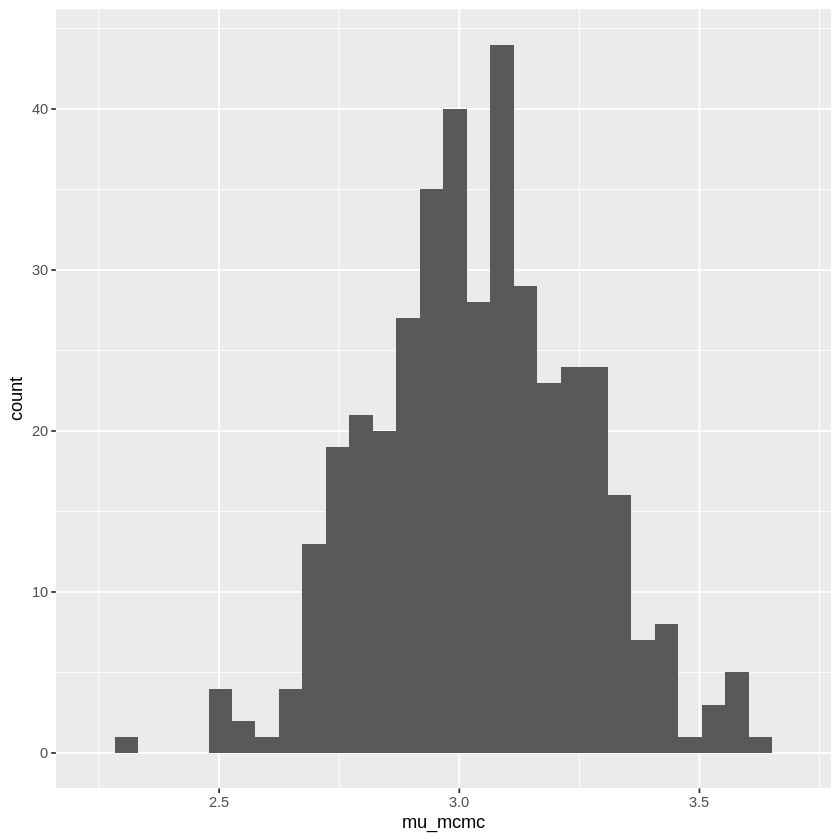

In [ ]:
# 生成した乱数から事後分布の形を図示(今回はμについてのみ)
library(ggplot2)

mu_df <- data.frame(mu_mcmc = mu_mcmc)

g <- ggplot(data=mu_df, aes(x=mu_mcmc))
g <- g + geom_histogram()
g

また、`print`関数を使用することで、生成した乱数に基づいたパーセント点を表示する事が出来ます。



In [ ]:
# 生成した乱数から事後分布のP(a≤μ≤b)などを求める
print(
  mcmc_result,
  probs = c(0.025, 0.5, 0.975)
)

Inference for Stan model: anon_model.
4 chains, each with iter=500; warmup=100; thin=1; 
post-warmup draws per chain=400, total post-warmup draws=1600.

        mean se_mean   sd   2.5%    50%  97.5% n_eff Rhat
mu      3.03    0.01 0.20   2.63   3.02   3.43   875    1
sigma   1.08    0.00 0.15   0.84   1.07   1.41  1553    1
lp__  -16.49    0.04 1.02 -19.28 -16.20 -15.50   769    1

Samples were drawn using NUTS(diag_e) at Mon Jan  5 05:42:46 2026.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


この結果から、$\mu$の事後分布から$P(a \leqq \mu \leqq b)=0.95$となる値が分かります。

この様な形で、事前分布を仮定し、得られたデータに基づいて事後分布を得ることで、統計モデルのパラメータ等を推定する方法がベイズ統計の考え方になります。

細かい手法や計算等は今は理解しなくて良いですが、こういったアプローチの統計学があるということを覚えておくと良いかと思います。

また`Stan`についても殆ど説明はしませんでしたが、使いこなせると様々な統計モデルを自在に構築する事が出来るようになります。